# Project: Exploring Movie Dataset & Finding Properties Associated with High Rated Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset choosen was TMDb Movies data. The dataset contains 10866 movie titles, and 21 columns describing certien characteristics of each movie such as the movie name, genre, budget, release year, and revenue. 
> The main question choosen to be answered is: What are the properties associated with high rated movies? the question will be more focused on three independent variables: who is the director that has highest number of movies among the list of the high rated movies? what year has the highest nomber of high rated movies? and what is the average budget for those list movies?
> I will choose only 100 movies out of 10866 to conduct my analysis.

In [1]:
#importing essintial libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
#importing dataset and getting the first five columns
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
#showing the diminsion of the dataframe
df_movies.shape

(10866, 21)

In [4]:
#Getting general information on each column
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#Getting statistical information over the dataset
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

**Since the main question focus on three main independent variables: director, budget_adj, & release year, and how those variables are associated with movies rating (or vote average), I will keep only those columns in addition to the movie title column. After dropping the unrelated columns, the following will be done:<br>
1- changing the name of the "vote_average" column to rating.<br>
2- dropping missing rows that have no director name (since such information can't be replaced by numeric value like a mean value).<br>
3- Checking for duplicates and dropping them.<br> 
4- Finally sorting the dataframe by rating in descending manner from the highst to lowest.<br>
5- Assigning "original_title" to be the index**

In [6]:
#dropping uneeded columns except director, rating, budget_adj, release_year, and original_title
df_movies.drop(columns=['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'cast', 'homepage', 'tagline', 'keywords', 
                        'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'revenue_adj'], 
              inplace = True)

In [7]:
#Renaming the vote_average columns to rating
df_movies.rename(columns={'vote_average':'rating'}, inplace=True)

*code below used to suppress scientific notation*

In [8]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [9]:
print(df_movies['budget_adj'].dtype)
df_movies.head()

float64


,original_title,director,rating,release_year,budget_adj
0,Jurassic World,Colin Trevorrow,6,2015,137999939
1,Mad Max: Fury Road,George Miller,7,2015,137999939
2,Insurgent,Robert Schwentke,6,2015,101199955
3,Star Wars: The Force Awakens,J.J. Abrams,8,2015,183999919
4,Furious 7,James Wan,7,2015,174799923


In [10]:
#to find out number of missing values and under which column
df_movies.isnull().sum()

original_title     0
director          44
rating             0
release_year       0
budget_adj         0
dtype: int64

In [11]:
#to drop missing values
df_movies.dropna(inplace=True)
df_movies.shape

(10822, 5)

In [12]:
#verifying that missing values were dropped
df_movies.isnull().sum()

original_title    0
director          0
rating            0
release_year      0
budget_adj        0
dtype: int64

In [13]:
#checking number of duplicates
sum(df_movies.duplicated())

1

In [14]:
#Dropping duplicates
df_movies.drop_duplicates(inplace=True)
sum(df_movies.duplicated())

0

In [15]:
#sorting dataframe by rating, then limit it to only the highest 250 movies
df_movies.sort_values(by=['rating'], ascending=False, inplace=True)

In [16]:
#selecting only the highst 100 movies
df_movies = df_movies.iloc[:100]
df_movies.shape

(100, 5)

In [17]:
#setting the movies' titles as the index
df_movies.set_index('original_title', inplace = True)
df_movies.head()

,director,rating,release_year,budget_adj
original_title,,,,
The Story of Film: An Odyssey,Mark Cousins,9,2011,0
The Mask You Live In,Jennifer Siebel Newsom,9,2015,0
Black Mirror: White Christmas,Carl Tibbetts,9,2014,0
Life Cycles,Derek Frankowski,9,2010,0
Pink Floyd: Pulse,David Mallet,9,2006,0


<a id='eda'></a>
## Exploratory Data Analysis



### Showing General Correlation Between Numerical Categories

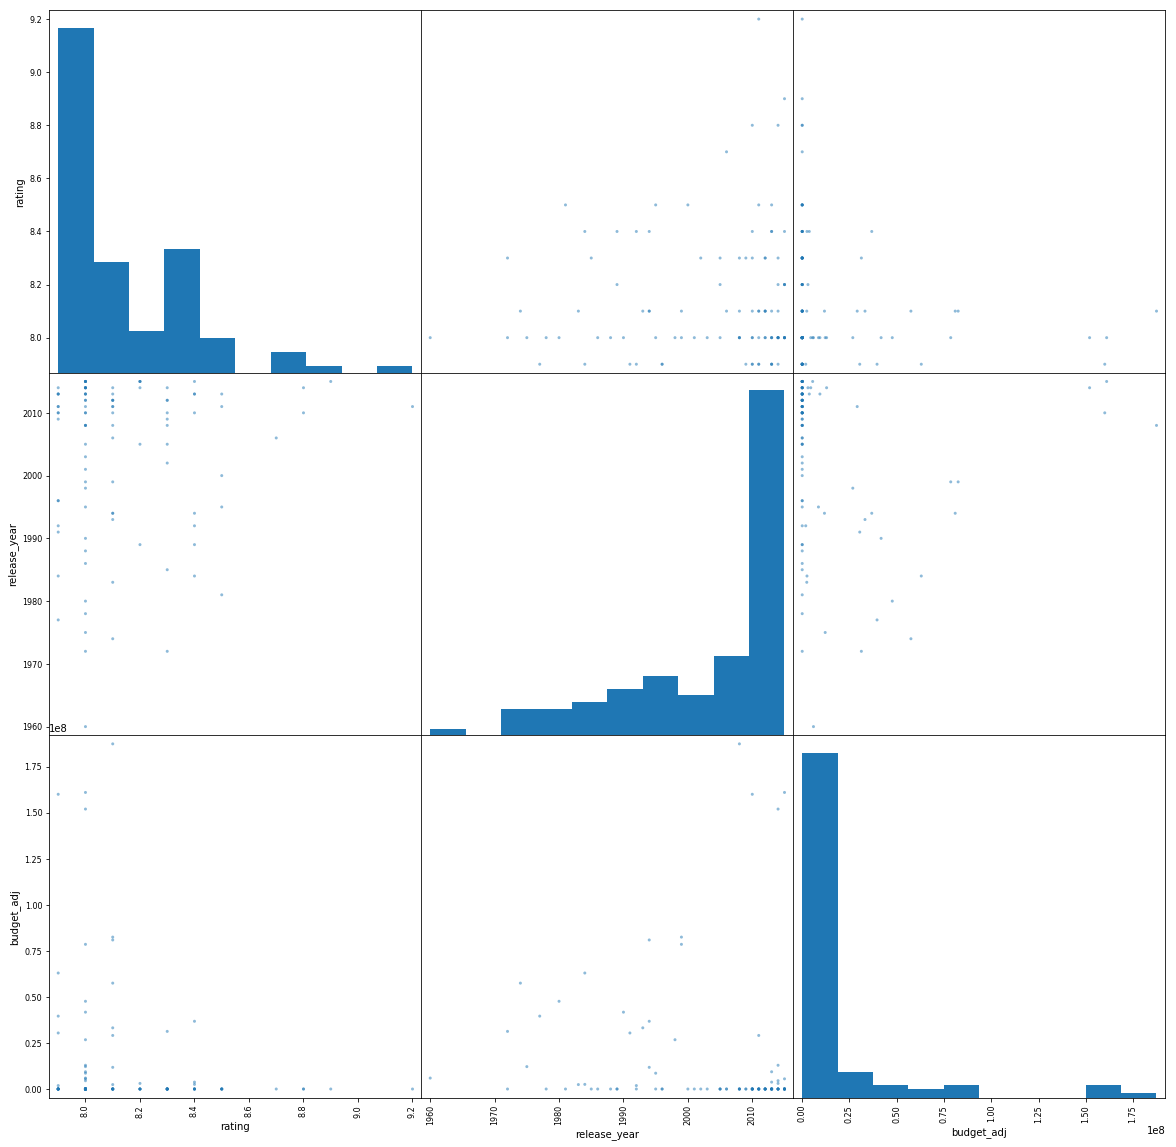

In [21]:
pd.plotting.scatter_matrix(df_movies, figsize=(20,20));

**From the above scatter plots, you can see:**<br>
1. The lower the rating the more likely that you have higher budget
2. Recent years tends to have more movies with higher ratings than the earlier ones.
3. Average budget, for the top 100 movies, tends to decrease over time.

### Research Question 1: Who are the directors that directed most of the good movies?

In [18]:
df_movies['director'].describe()

count                   100
unique                   90
top       Christopher Nolan
freq                      3
Name: director, dtype: object

In [63]:
director_hits = df_movies['director'].value_counts()

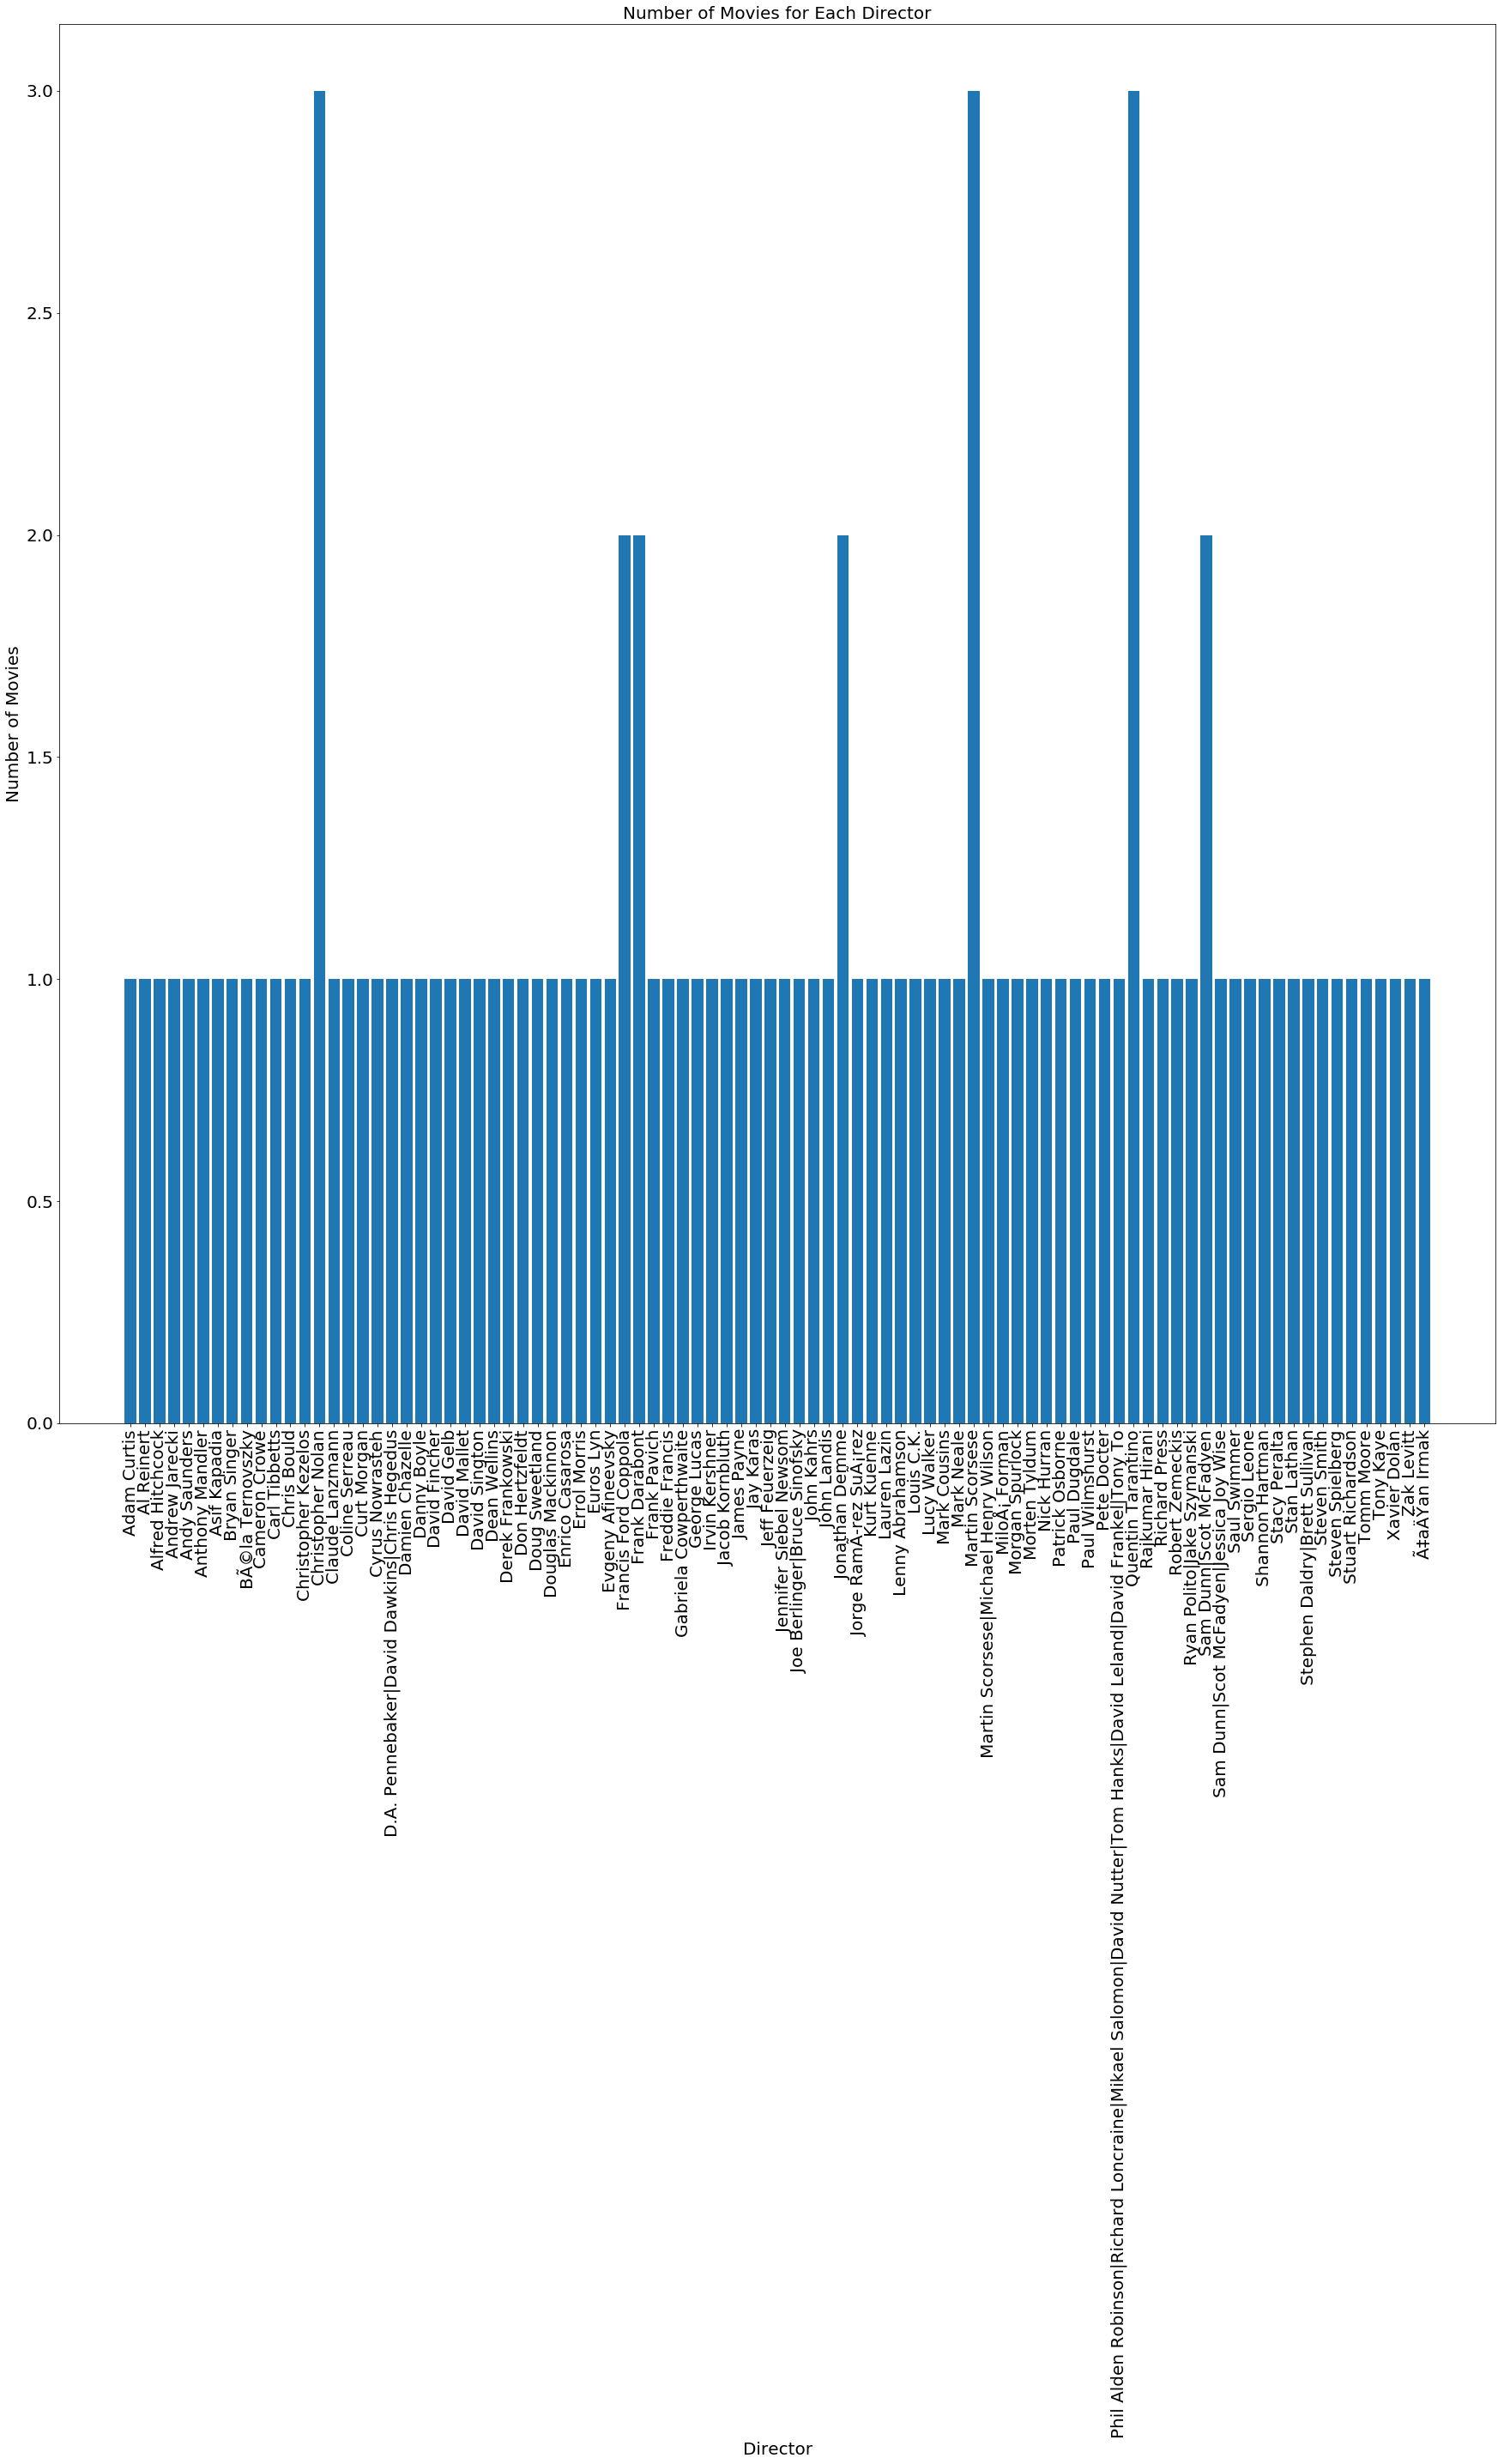

In [37]:
plt.figure(figsize=(30,30))
plt.bar(director_hits.index, director_hits);
plt.xticks(rotation=90, fontsize = 20);
plt.yticks(fontsize = 20);
plt.xlabel('Director', fontsize=20)
plt.ylabel('Number of Movies', fontsize=20)
plt.title('Number of Movies for Each Director', fontsize=20);

**From the above bar plot, you can see:**<br>
1. Only three directors who directed more than 2 movies, which considered by audiance as part of the top 100 movies.
2. Only four directors who directed 2 movies, which considered by audiance as part of the top 100 movies.
3. The remainig directors have had only one movie that is considered the best.

### Research Question 2  What are the years that have most of the good movies?


In [64]:
year_hits = df_movies['release_year'].value_counts()

(37,)

In [22]:
labels = year_hits.index
labels

Int64Index([2015, 2013, 2014, 2010, 2012, 2011, 2008, 2005, 1994, 2006, 1996,
            1972, 1984, 1992, 2009, 1995, 1989, 1999, 1998, 2002, 1974, 1975,
            1977, 1978, 1980, 1981, 1983, 2001, 1985, 1986, 1988, 2003, 1990,
            1991, 2000, 1993, 1960],
           dtype='int64')

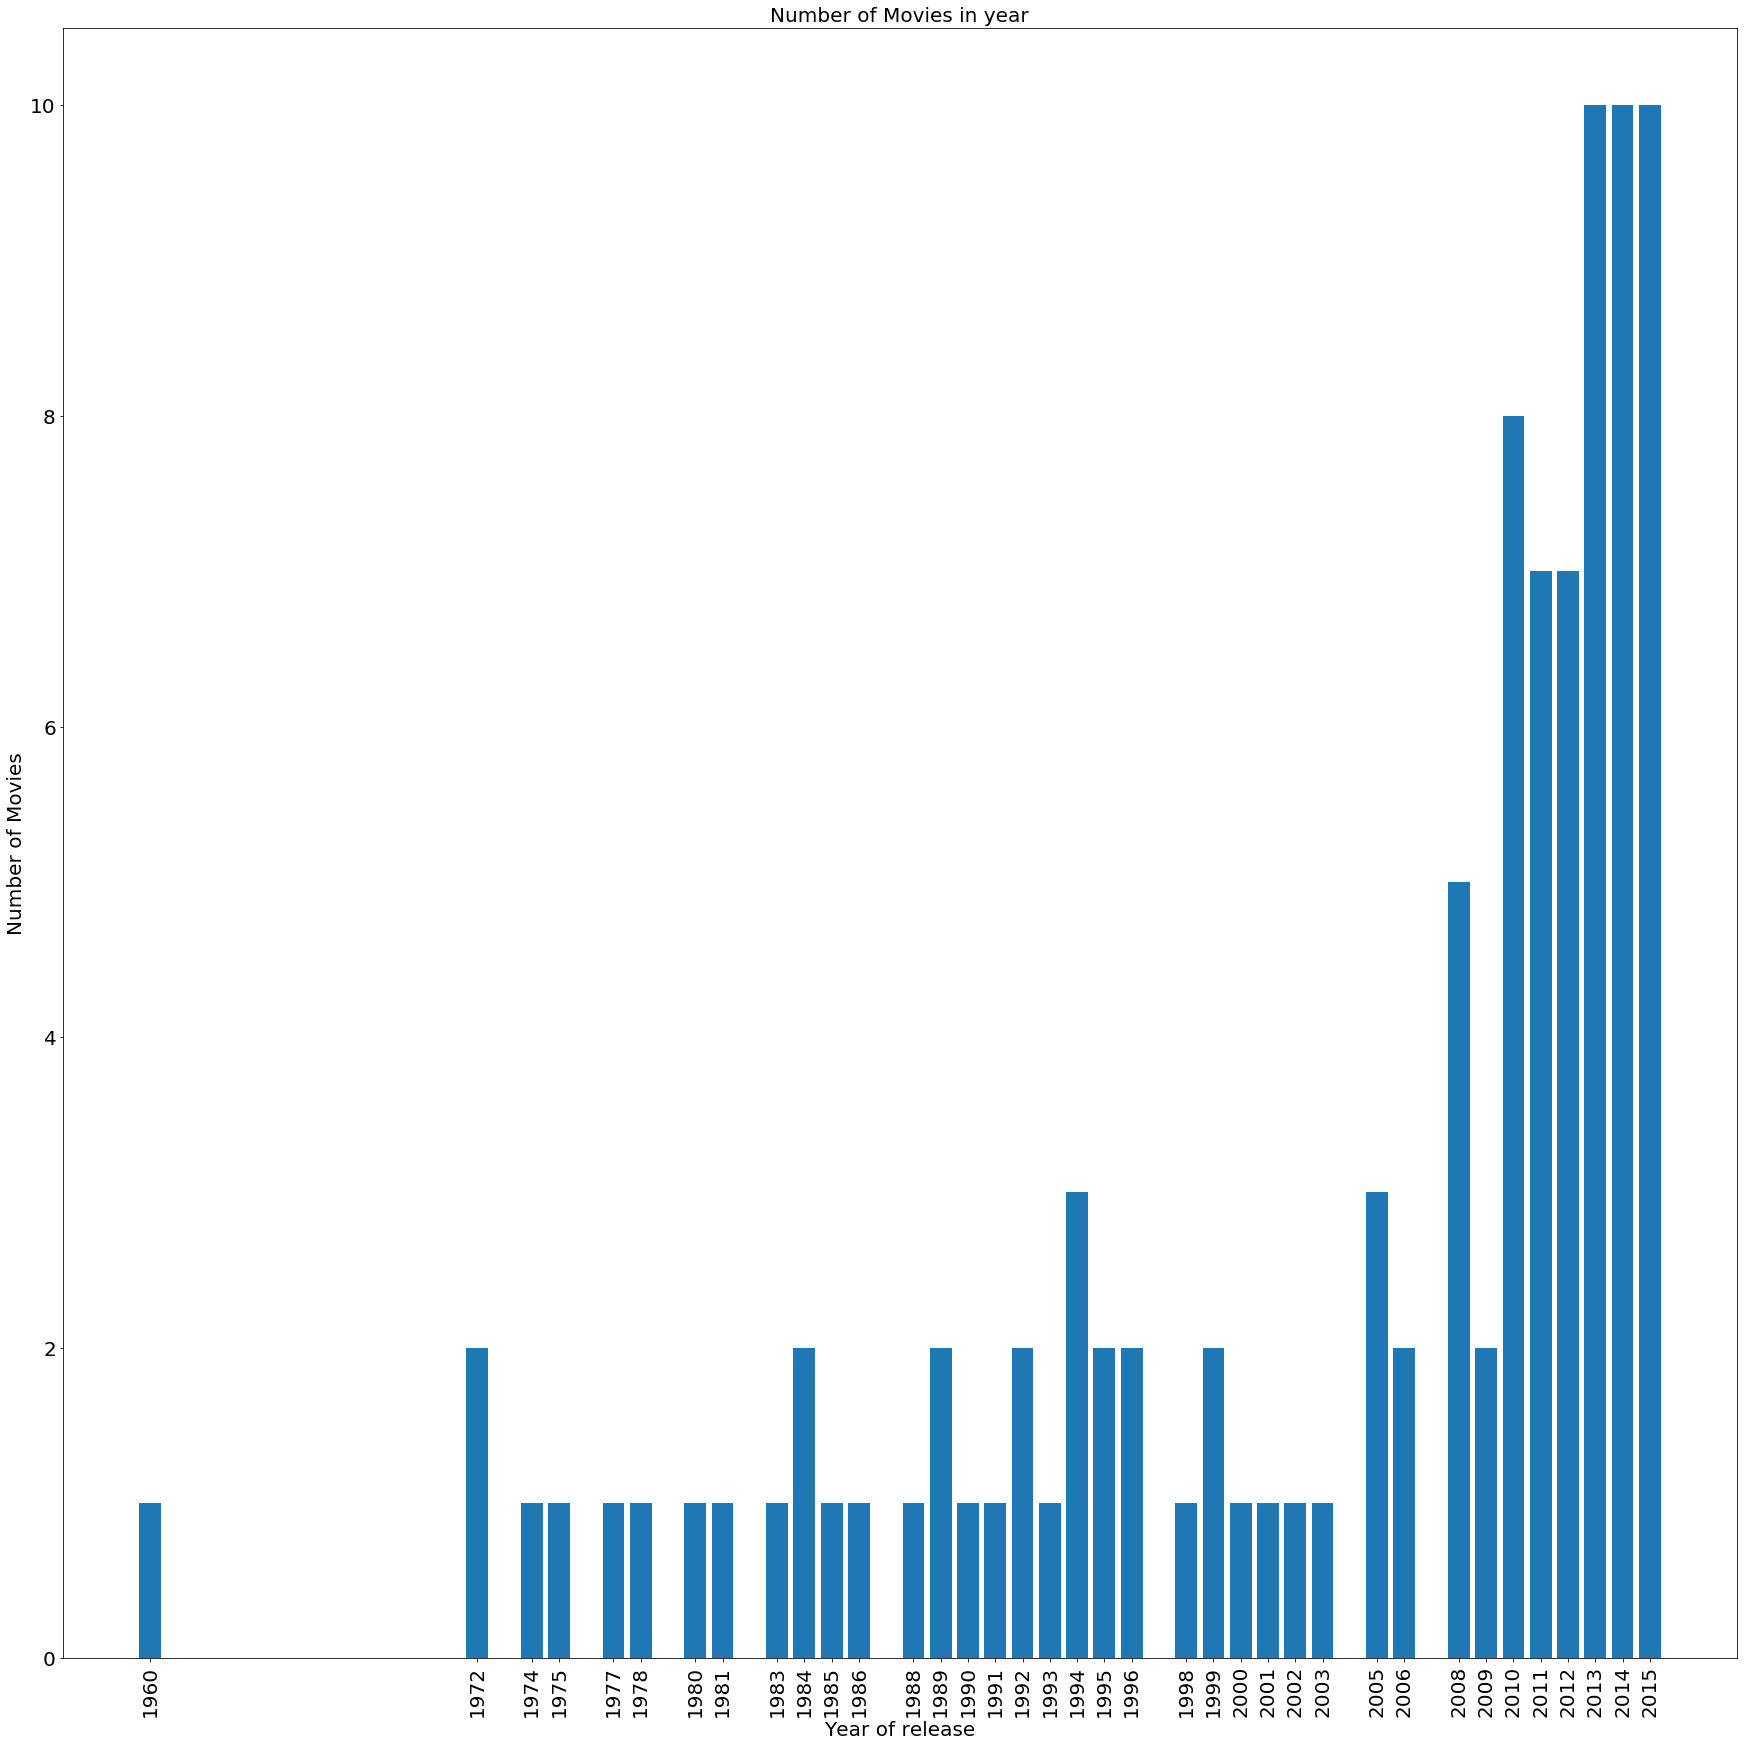

In [38]:
plt.figure(figsize=(30,30))
plt.bar(year_hits.index, year_hits, tick_label = labels);
plt.xticks(rotation=90, fontsize = 20);
plt.yticks(fontsize = 20);
plt.xlabel('Year of release', fontsize=20)
plt.ylabel('Number of Movies', fontsize=20)
plt.title('Number of Movies in year', fontsize=20);

**From the above bar plot, you can see that half of the top 100 movies were released during the period 2008-2015**

### Research Question 3  What is the average budget for those 100 movies?
**The visualization will done box plot**

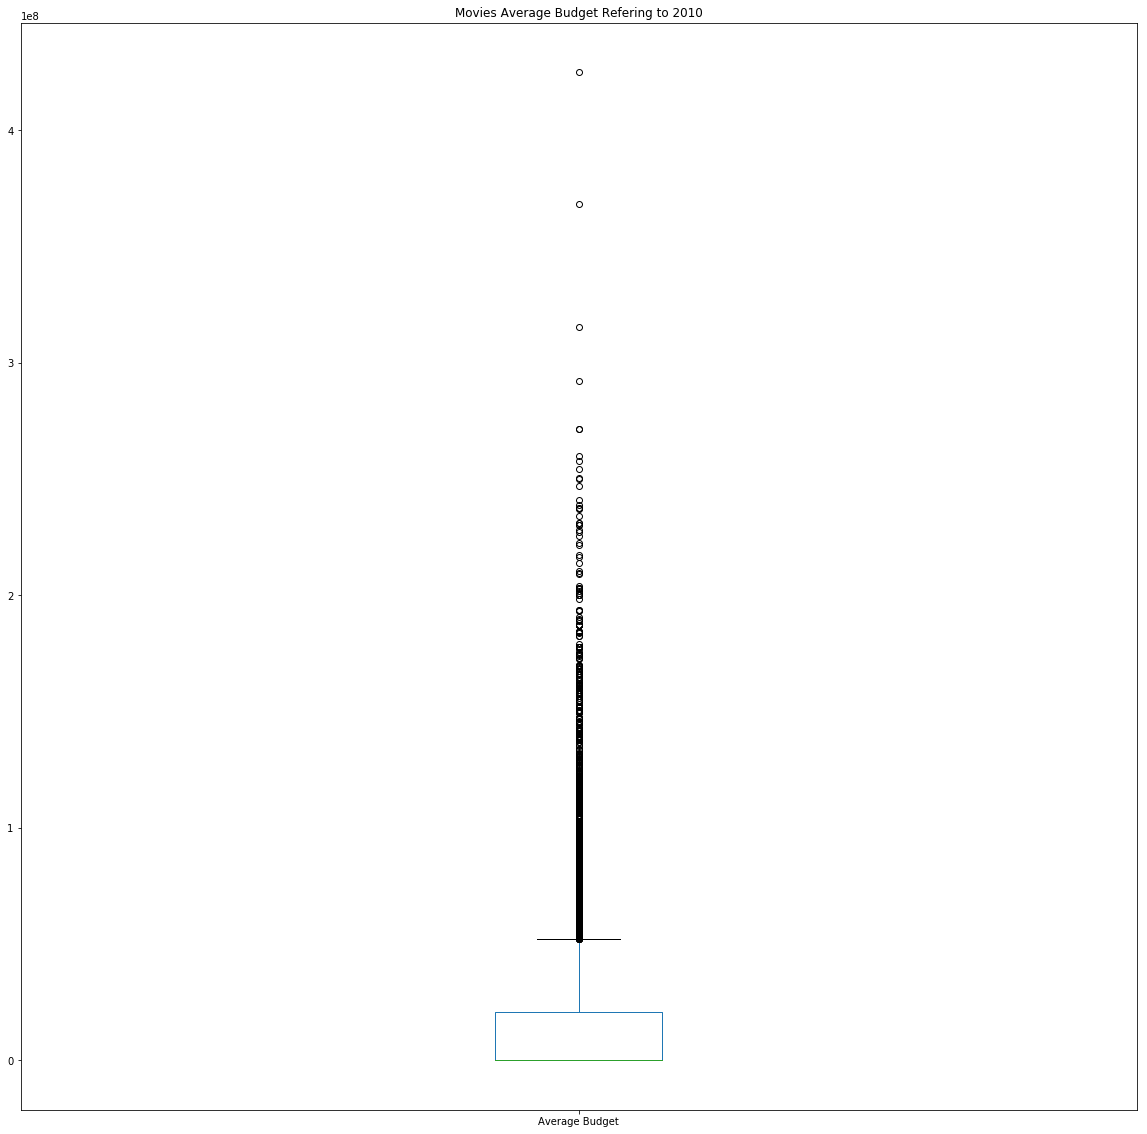

In [67]:
df_movies.rename(columns={'budget_adj': 'Average Budget'}, inplace=True)
df_movies["Average Budget"].plot(kind='box', figsize=(20,20));
plt.title('Movies Average Budget Refering to 2010');

In [68]:
df_movies["Average Budget"].describe()

count       10866
mean     17551040
std      34306156
min             0
25%             0
50%             0
75%      20853251
max     425000000
Name: Average Budget, dtype: float64

**From the above box plot, you can see that most of the movies budget are zero when their original budgets are reflected back to year 2010.**

<a id='conclusions'></a>
## Conclusions

>To recap what was done through the report, let us go breifly through each step and descripe what I did. However, I need to address the limitation first.

### Limitation
>There was only one limitation in the dataset which was imposed due to the nature of the research questions themselves.
Since the questions were related to only the top 100 movies, the corralations plot may not be accurate & wouldn't reflect the actual relathinship between the rating, budget, and year of release. Nontheless, by knowing that we limited our research with clear intention to focus on the top 100 movies, those limitation can be accepted.

### Data Gathering & Setting Research Questions:
> 1- I choose the dataset for TMDb Movies which desplays the infromation related for over 10000 (i.e. title of the movie, budget, directors and casts nmaes, release year ...etc).<br>
> 2- I checked the dataset and got fimiliar with it by understanding what each column means, type of each column, and the size of the dataset.<br>
>3- I sat three research, but first I chose to limit those data to only the first 100. 
those questions were: who are the directors that made most of the movies listed among the top 100? when was most of the top 100 movies released? finally, what is the budget of those 100 movies relitave to year 2010 (to ahve a fair comparison by refering to cerin point in time)?

### Data wrangling
> In data wrangling, the following was done:<br>
1- Dropped all columns that are not related to my research questions, and only five lift (title, director, average voting, release year, budget avj). <br>
2- The name of average voting was changed to be rating. <br>
3- Checked for missing data, and all were found under director column. The total if missing data were 44 out of 10866. Since this represents only 0.4% of the data, those data were dropped.<br>
4- Checked for for dublicates, and only one row was found and deleted.<br>
5- The dataframe was limited to the top 100 movies using sort function.<br>
6- Final step was to have the movie title as the index of the new dataframe.

### Data Exploring:
>In this section each research question was eplored by its own, and the following was found:<br>
1- For the first question, it was found that: there are 90 unique values out of 100 under director columns. Only three drectors have made 3 movies, four directors made 2 movies, and the rest made only one movie.<br>
2- For the second question, it was found that: there are 37 unique values out of 100 under release_year columns. Most of the top 100 movies were made after the 2000's, espcially during the period between 2010 - 2015.<br>
3- For the last question, it was found that: most of the movies budget are zero when their original budgets are reflected back to year 2010.



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0